In [191]:
import numpy as np
import pandas as pd
import matplotlib as plt
import yfinance as yf
import keras 
import os
import tensorflow
import datetime 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import random
import scipy.stats as st

In [121]:
def DataPrep(e='e'):






    
    return e

In [143]:
#simple data prep
df = yf.Ticker('AAPL').history(period='max')
df = df[['Close']]
for i in range(100, -2,-1):
    df[f'{i} daysago'] = df['Close'].shift(i)
    df = df.copy()
df = df.dropna()
df = df.drop(columns=['Close'])
df
#ok so if i have tmrs price be the mean of the prob distro,
# using stddev i can map a psuedo confidence interval type shit

#if i use a normal distro, unlike the digits recognition ml, 
#whos output is discrete(a vector of probabilities),
#my output would have to resemble a continuous function, 
#to simulate the normal distro

df['stddev'] = np.std(df,axis=1)
df['rando'] = random.normalvariate(df['-1 daysago'],df['stddev'])
df = df.drop(columns=['-1 daysago'])
df = df.drop(columns=['stddev'])
df





,100 daysago,99 daysago,98 daysago,97 daysago,96 daysago,95 daysago,94 daysago,93 daysago,92 daysago,91 daysago,...,8 daysago,7 daysago,6 daysago,5 daysago,4 daysago,3 daysago,2 daysago,1 daysago,0 daysago,rando
Date,,,,,,,,,,,,,,,,,,,,,
1981-05-07 00:00:00-04:00,0.099058,0.093890,0.086998,0.089152,0.091737,0.097335,0.102072,0.106380,0.111978,0.122315,...,0.099058,0.097335,0.096043,0.097766,0.097766,0.097335,0.096904,0.094321,0.095612,0.089506
1981-05-08 00:00:00-04:00,0.093890,0.086998,0.089152,0.091737,0.097335,0.102072,0.106380,0.111978,0.122315,0.124037,...,0.097335,0.096043,0.097766,0.097766,0.097335,0.096904,0.094321,0.095612,0.096474,0.087355
1981-05-11 00:00:00-04:00,0.086998,0.089152,0.091737,0.097335,0.102072,0.106380,0.111978,0.122315,0.124037,0.121023,...,0.096043,0.097766,0.097766,0.097335,0.096904,0.094321,0.095612,0.096474,0.094321,0.087355
1981-05-12 00:00:00-04:00,0.089152,0.091737,0.097335,0.102072,0.106380,0.111978,0.122315,0.124037,0.121023,0.117578,...,0.097766,0.097766,0.097335,0.096904,0.094321,0.095612,0.096474,0.094321,0.094321,0.086948
1981-05-13 00:00:00-04:00,0.091737,0.097335,0.102072,0.106380,0.111978,0.122315,0.124037,0.121023,0.117578,0.118870,...,0.097766,0.097335,0.096904,0.094321,0.095612,0.096474,0.094321,0.094321,0.093890,0.085667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-11 00:00:00-04:00,183.610962,182.063049,181.314072,182.073059,184.120270,182.272781,180.914627,182.382629,181.174255,180.505173,...,210.619995,216.750000,220.270004,221.550003,226.339996,227.820007,228.679993,232.979996,227.570007,218.548015
2024-07-12 00:00:00-04:00,182.063049,181.314072,182.073059,184.120270,182.272781,180.914627,182.382629,181.174255,180.505173,179.416656,...,216.750000,220.270004,221.550003,226.339996,227.820007,228.679993,232.979996,227.570007,230.539993,222.025310
2024-07-15 00:00:00-04:00,181.314072,182.073059,184.120270,182.272781,180.914627,182.382629,181.174255,180.505173,179.416656,174.862823,...,220.270004,221.550003,226.339996,227.820007,228.679993,232.979996,227.570007,230.539993,234.399994,222.078396


In [217]:
# Output should be a vector, 13 Xs maybe, like [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]
# being the stddevs from tmrs price, and the values would be the %prob
# [0.ugly, 0.decent, 0.highest, 0.decent, 0.ugly] to simplify
# function to convert might look smth like this:

output = [0.01,0.1,0.78,0.1,0.01]

#for list
max_index = output.index(max(output))
z = st.norm.ppf(max(output))

#for array
# output = np.array(output)
# max_index = np.where(output == max(output))[0][0]
# st.norm.ppf(max(output))



df = yf.Ticker('AAPL').history(start='2010-01-01',end='2010-01-20')
df = np.array(df['Close'])
sigma = np.std(df)
mu = np.mean(df)
sigma, mu,df

z = (df[-1]-mu)/sigma
st.norm.cdf(z)



price_maybe= z*sigma + mu
price_maybe,df


#wait a minute price data isnt normally distributed, its lognormal?
#i think i need to log transform the data to make it normally distributed
#price %return is normally distributed(i think?), so i can use that to predict price, but ml is shit with it so idk


(6.493076324462891,
 array([6.46197701, 6.47315025, 6.37018538, 6.3584075 , 6.40068054,
        6.34421682, 6.27205086, 6.36052227, 6.32368469, 6.21800184,
        6.49307632]))

In [123]:
sc = MinMaxScaler(feature_range=(0,1))

scaled = sc.fit_transform(df)
X,Y = scaled[:,:101],scaled[:,101:]

split = int(len(X)*0.90)
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
X_train, X_test, Y_train, Y_test = X_train.reshape((-1,101,1)), X_test.reshape((-1,101,1)), Y_train.reshape((-1,1)), Y_test.reshape((-1,1))
X_train.shape, Y_train.shape

((9800, 101, 1), (9800, 1))

In [126]:
model3 = Sequential()
model3.add(InputLayer((101, 1)))
model3.add(LSTM(101))
# model3.add(Dense(101, 'linear'))
model3.add(Dense(1, 'linear'))
cp1 = ModelCheckpoint('model/6th.keras', save_best_only=False)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model3.fit(X_train, Y_train, epochs=5, batch_size=16, callbacks=[cp1])


Epoch 1/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - loss: 3.6773e-04 - root_mean_squared_error: 0.0155
Epoch 2/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - loss: 9.8533e-06 - root_mean_squared_error: 0.0031
Epoch 3/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - loss: 7.3068e-06 - root_mean_squared_error: 0.0027
Epoch 4/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - loss: 7.4626e-06 - root_mean_squared_error: 0.0027
Epoch 5/5
613/613 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 5.3996e-06 - root_mean_squared_error: 0.0023


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
2.0539986505699486
-1.8568136974146037


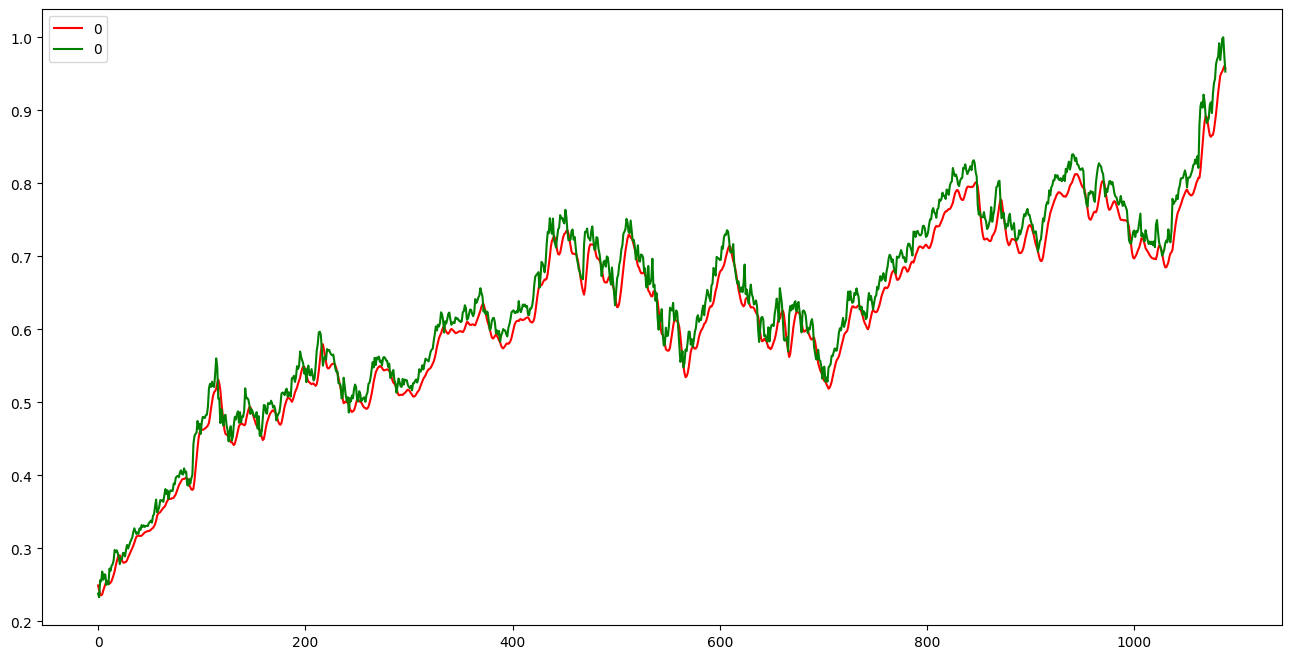

In [125]:
model3 = load_model('model/6th.keras')
y_pred = model3.predict(X_test)

avg_error = (np.sum(np.sqrt((Y_test - y_pred)**2)))/len(Y_test)*100
print(avg_error)
avg_error = (np.sum(y_pred - Y_test))/len(Y_test)*100
print(avg_error)

y_pred,sp500_Y_test = pd.DataFrame(y_pred),pd.DataFrame(Y_test)
for i in range(0,y_pred.shape[1]): 
    oneday= pd.concat([y_pred[i],sp500_Y_test[i]],axis=1)
    oneday.plot(figsize=(16,8),color = ('red','green'))
    
    